In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import  make_classification
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X1 = np.random.uniform(low=0.2,high=1.6, size=(100,2))
Y1 = np.zeros(100)

In [19]:
X2 = np.random.normal(loc=0.1,scale=0.5, size=(100,2))
Y2 = np.zeros(100)+1

In [20]:
X = np.vstack([X1, X2])
Y = np.hstack([Y1, Y2])

In [21]:
X.shape, Y.shape

((200, 2), (200,))

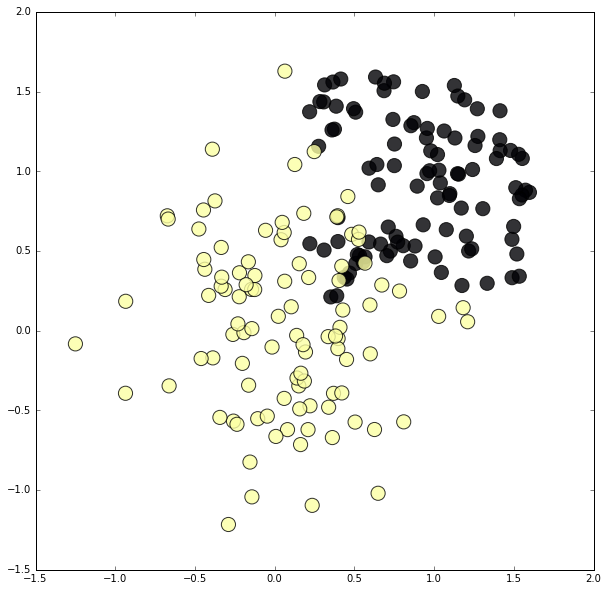

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y, s=200, cmap='rainbow', alpha=0.8)
plt.show()

In [91]:
def plot_tree_clf(max_depth):
    
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    tree_clf.fit(X, Y)
    
    
    
    path = tree_clf.decision_path([X[0]])
    n_nodes = tree_clf.tree_.node_count
    children_left = tree_clf.tree_.children_left
    children_right = tree_clf.tree_.children_right
    feature = tree_clf.tree_.feature
    threshold = tree_clf.tree_.threshold
    leafs_value = tree_clf.tree_.value
    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True
            
    print('max_depth=', max_depth)
    print("The binary tree structure has %s nodes and has "
          "the following tree structure:"
          % n_nodes)
    for i in range(n_nodes):
        if is_leaves[i]:
            print("%snode=%s leaf node." % (node_depth[i] * "  ", i))
        else:
            print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
                  "node %s."
                  % (node_depth[i] * "  ",
                     i,
                     children_left[i],
                     feature[i],
                     threshold[i],
                     children_right[i],
                     ))
    print()
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()

    h = .05
    xx, yy = np.meshgrid(    

        np.arange(y_min, y_max, h),
        np.arange(x_min, x_max, h),
    )
    Z = tree_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(15, 15))
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('RdYlBu'), alpha=0.4)
    plt.scatter(X[:,0],X[:,1],c=Y, s=200, cmap='RdYlBu', alpha=0.8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

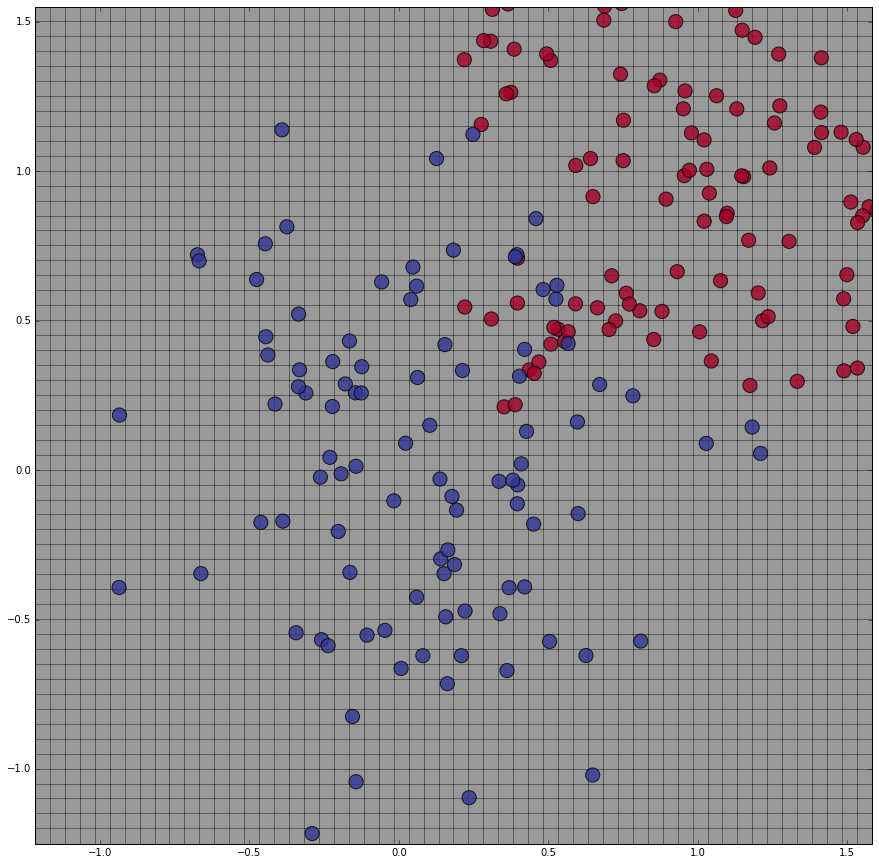

In [92]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
Z = np.zeros((57,57))
plt.figure(figsize=(15, 15))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('gray'), alpha=0.4)
plt.scatter(X[:,0],X[:,1],c=Y, s=200, cmap='RdYlBu', alpha=0.8)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

max_depth= 1
The binary tree structure has 3 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 leaf node.



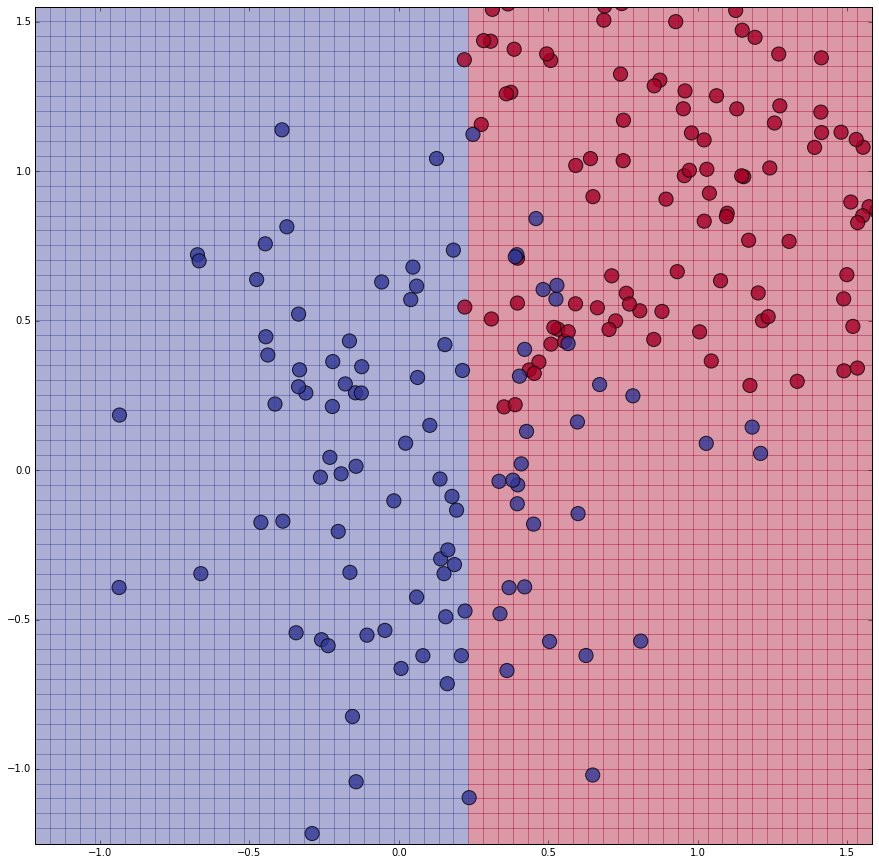

max_depth= 2
The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 leaf node.



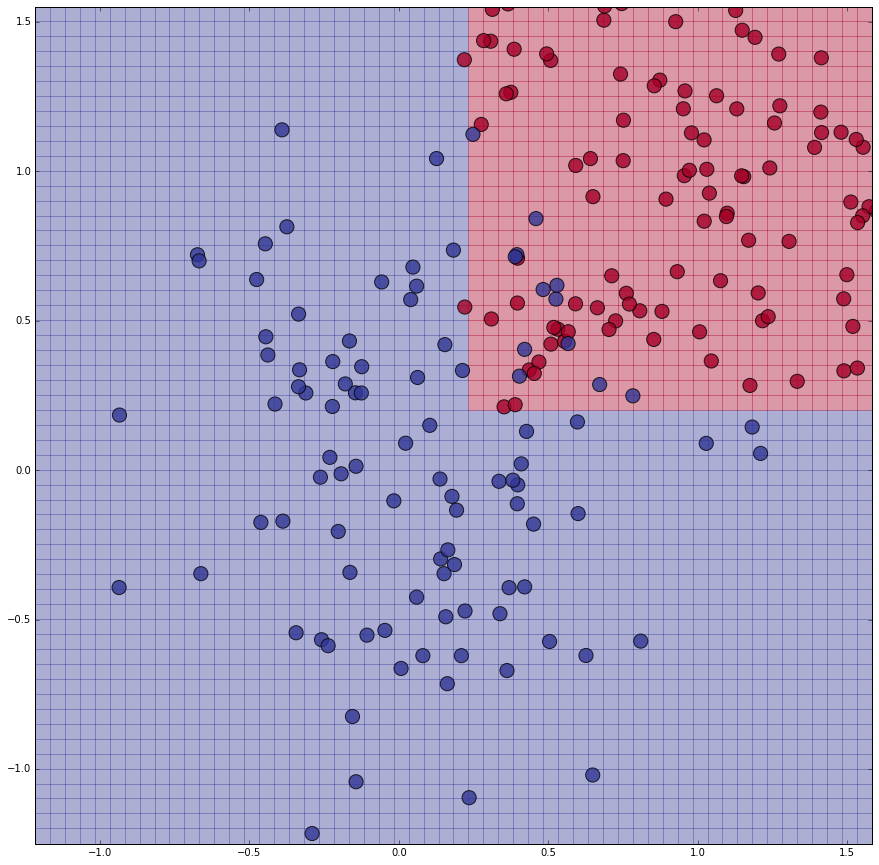

max_depth= 3
The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 6.
      node=5 leaf node.
      node=6 leaf node.



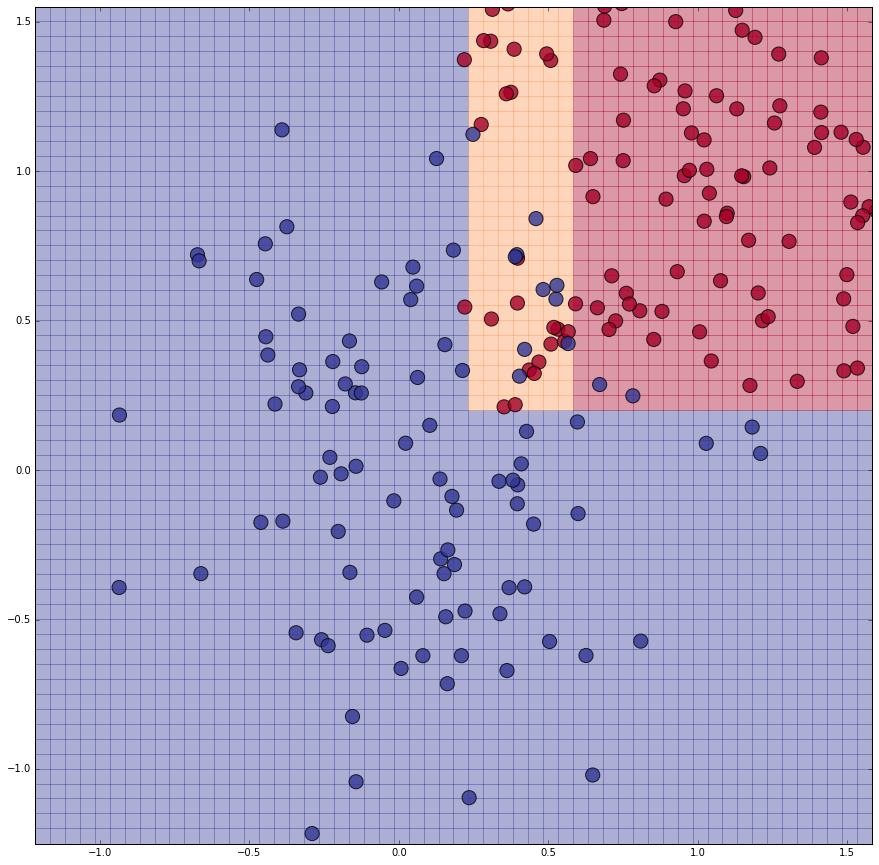

max_depth= 4
The binary tree structure has 11 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 8.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 7.
        node=6 leaf node.
        node=7 leaf node.
      node=8 test node: go to node 9 if X[:, 1] <= 0.29163190722465515 else to node 10.
        node=9 leaf node.
        node=10 leaf node.



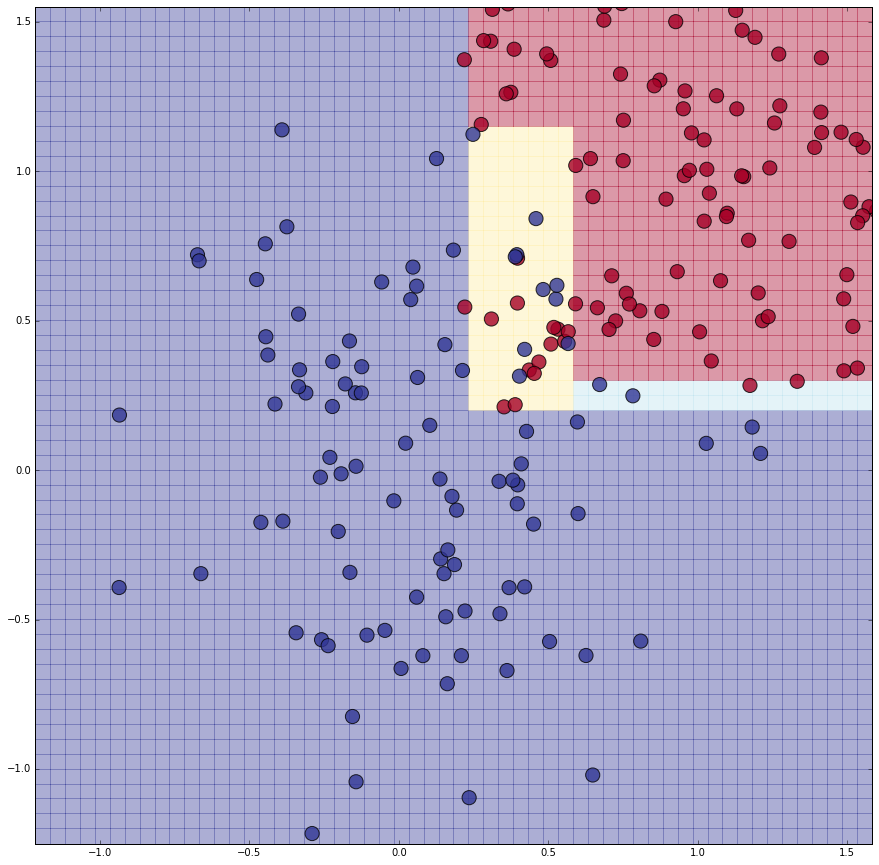

max_depth= 5
The binary tree structure has 15 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 10.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 9.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 8.
          node=7 leaf node.
          node=8 leaf node.
        node=9 leaf node.
      node=10 test node: go to node 11 if X[:, 1] <= 0.29163190722465515 else to node 14.
        node=11 test node: go to node 12 if X[:, 0] <= 0.9786607027053833 else to node 13.
          node=12 leaf node.
          node=13 leaf node.
        node=14 leaf node.



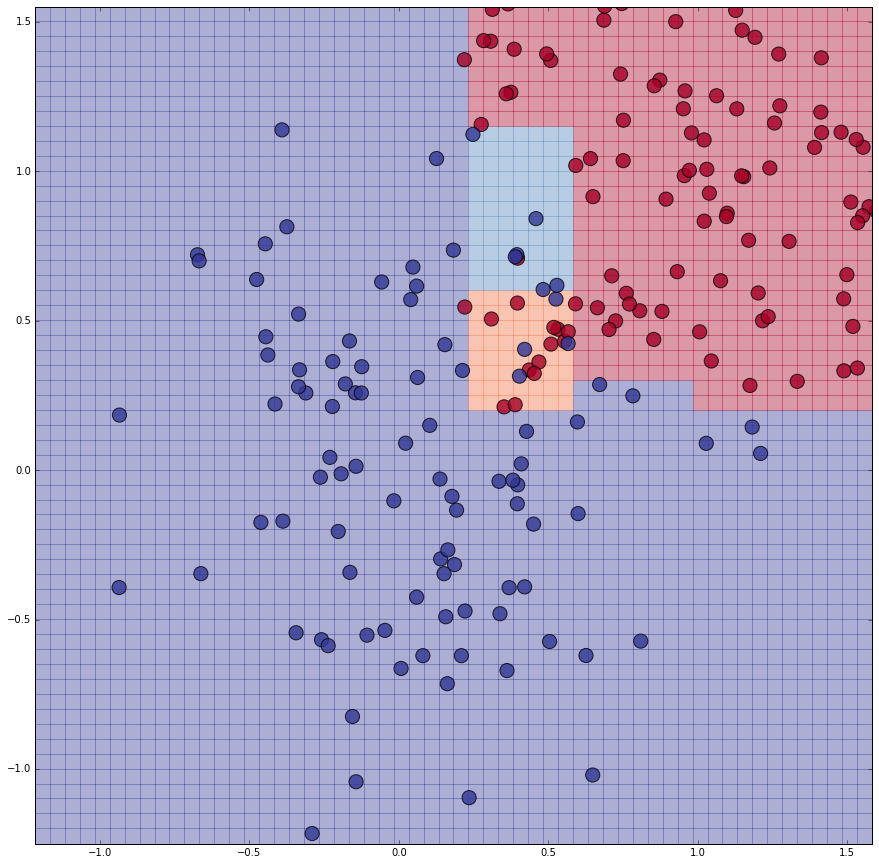

max_depth= 6
The binary tree structure has 19 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 14.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 13.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 10.
          node=7 test node: go to node 8 if X[:, 0] <= 0.5602936744689941 else to node 9.
            node=8 leaf node.
            node=9 leaf node.
          node=10 test node: go to node 11 if X[:, 0] <= 0.42782217264175415 else to node 12.
            node=11 leaf node.
            node=12 leaf node.
        node=13 leaf node.
      node=14 test node: go to node 15 if X[:, 1] <= 0.29163190722465515 else to node 18.
        node=15 test 

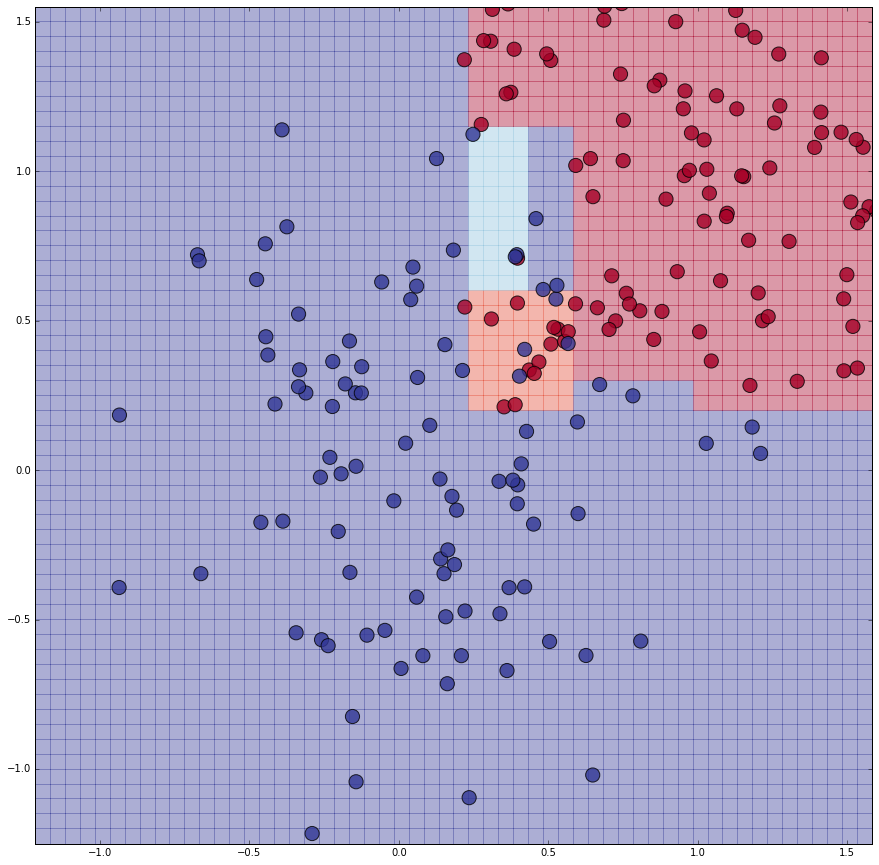

max_depth= 7
The binary tree structure has 23 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 18.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 17.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 12.
          node=7 test node: go to node 8 if X[:, 0] <= 0.5602936744689941 else to node 11.
            node=8 test node: go to node 9 if X[:, 0] <= 0.4283849000930786 else to node 10.
              node=9 leaf node.
              node=10 leaf node.
            node=11 leaf node.
          node=12 test node: go to node 13 if X[:, 0] <= 0.42782217264175415 else to node 16.
            node=13 test node: go to node 14 if X[:, 1] <= 0.711263298

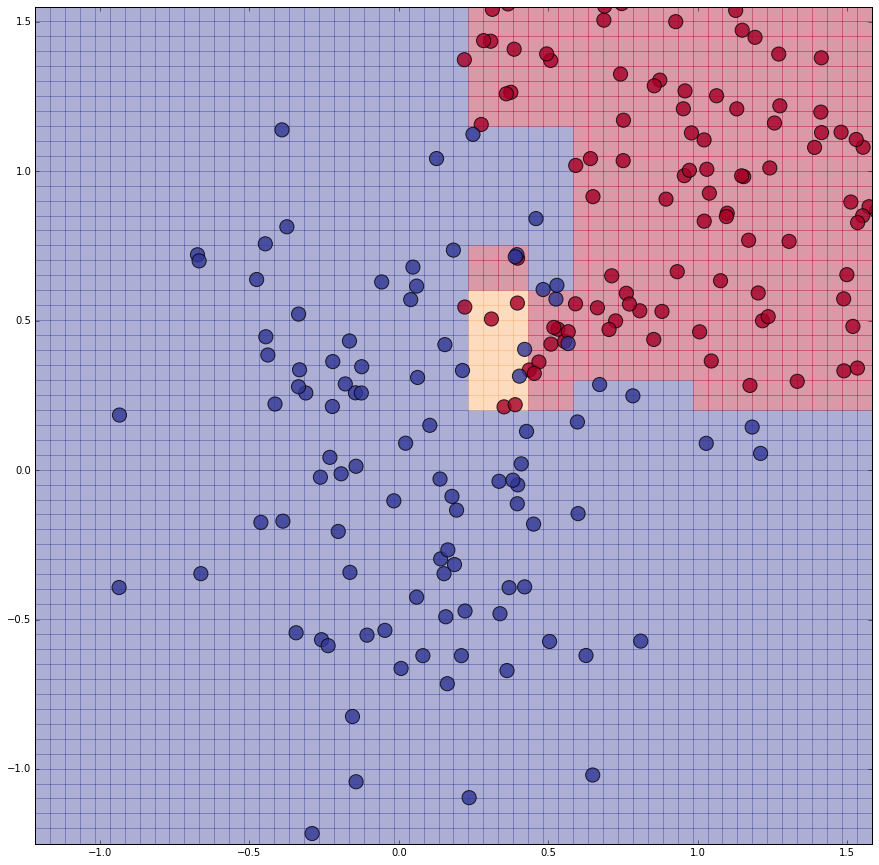

max_depth= 8
The binary tree structure has 25 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 20.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 19.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 14.
          node=7 test node: go to node 8 if X[:, 0] <= 0.5602936744689941 else to node 13.
            node=8 test node: go to node 9 if X[:, 1] <= 0.4127345681190491 else to node 12.
              node=9 test node: go to node 10 if X[:, 1] <= 0.3827953338623047 else to node 11.
                node=10 leaf node.
                node=11 leaf node.
              node=12 leaf node.
            node=13 leaf node.
          node=14 test node: g

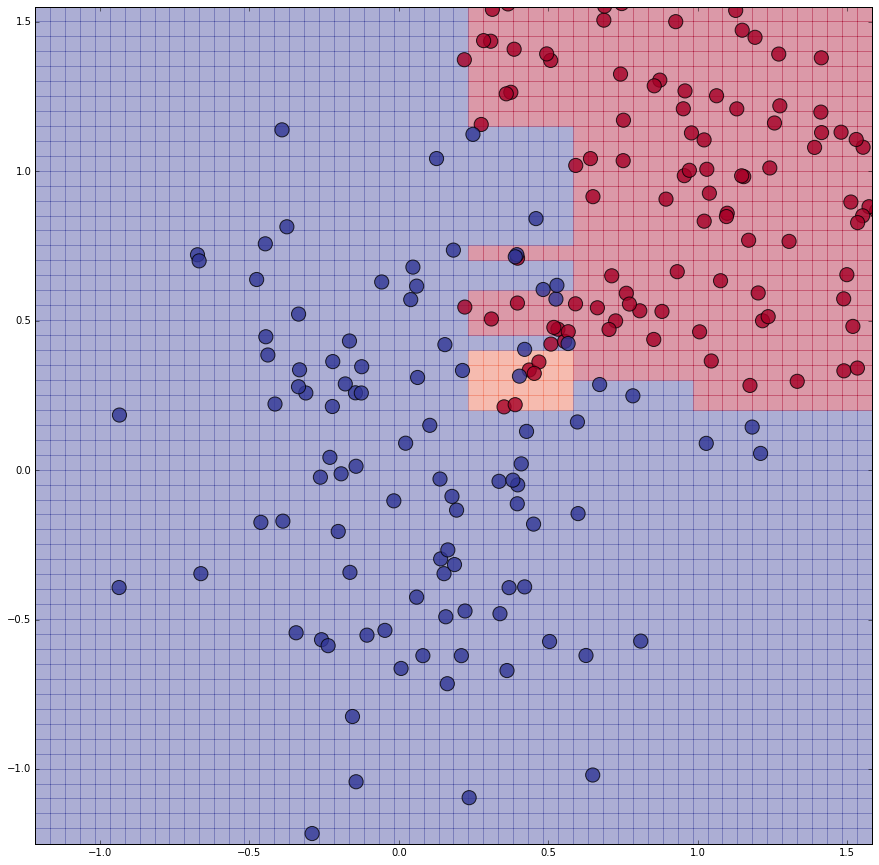

max_depth= 9
The binary tree structure has 25 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 20.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 19.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 14.
          node=7 test node: go to node 8 if X[:, 0] <= 0.5602936744689941 else to node 13.
            node=8 test node: go to node 9 if X[:, 0] <= 0.4283849000930786 else to node 12.
              node=9 test node: go to node 10 if X[:, 0] <= 0.3999548554420471 else to node 11.
                node=10 leaf node.
                node=11 leaf node.
              node=12 leaf node.
            node=13 leaf node.
          node=14 test node: g

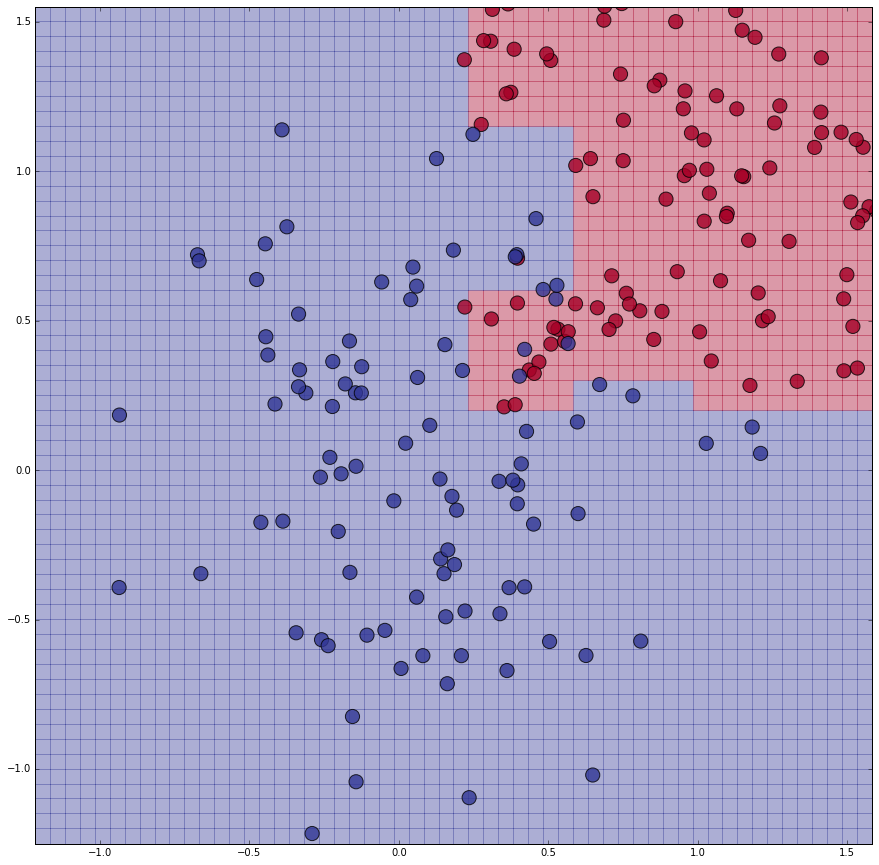

max_depth= 10
The binary tree structure has 29 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.21589916944503784 else to node 2.
  node=1 leaf node.
  node=2 test node: go to node 3 if X[:, 1] <= 0.1863078773021698 else to node 4.
    node=3 leaf node.
    node=4 test node: go to node 5 if X[:, 0] <= 0.5663771629333496 else to node 24.
      node=5 test node: go to node 6 if X[:, 1] <= 1.1397165060043335 else to node 23.
        node=6 test node: go to node 7 if X[:, 1] <= 0.5655360221862793 else to node 18.
          node=7 test node: go to node 8 if X[:, 0] <= 0.5602936744689941 else to node 17.
            node=8 test node: go to node 9 if X[:, 1] <= 0.4127345681190491 else to node 16.
              node=9 test node: go to node 10 if X[:, 1] <= 0.3827953338623047 else to node 15.
                node=10 test node: go to node 11 if X[:, 0] <= 0.41973739862442017 else to node 14.
                  node=11 test node: go to node 12 if X[:, 0] <

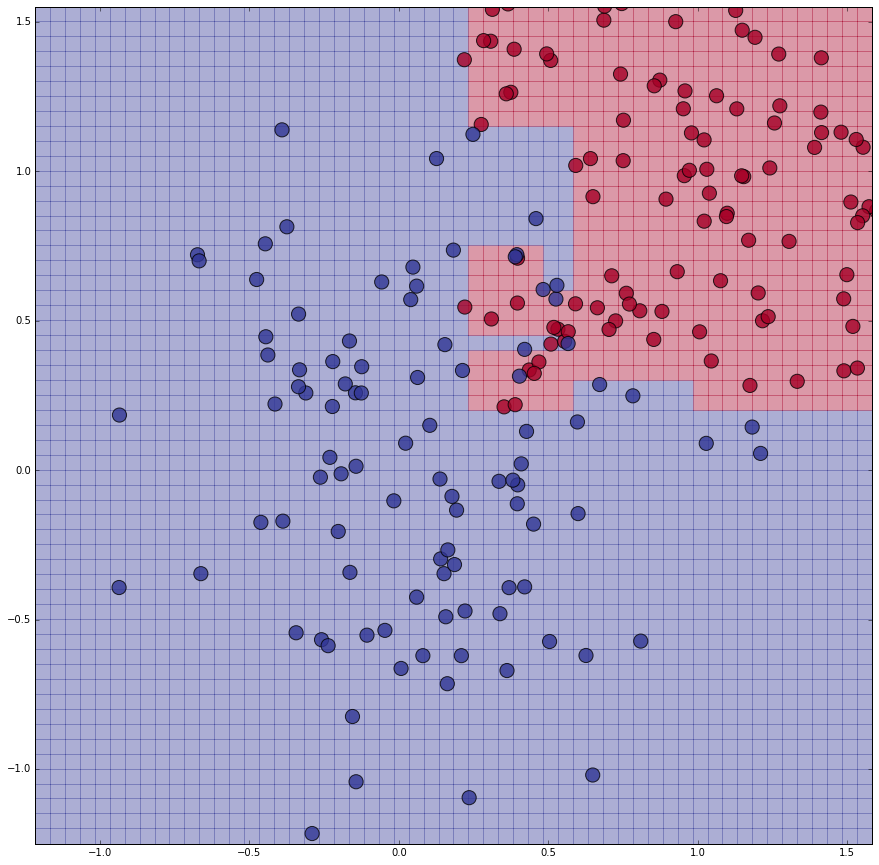

In [94]:
for i in range(1, 11):
    plot_tree_clf(max_depth=i)